In [4]:
import keras
from keras.datasets import fashion_mnist

In [5]:
fashion_mnist

<module 'keras.datasets.fashion_mnist' from '/usr/local/lib/python3.8/dist-packages/keras/datasets/fashion_mnist.py'>

In [8]:
(X_train,y_train),(X_test,y_test)= fashion_mnist.load_data()

In [10]:
X_train.shape

(60000, 28, 28)

In [11]:
y_train.shape

(60000,)

In [13]:
X_test.shape

(10000, 28, 28)

In [14]:
y_test.shape

(10000,)

In [17]:
import numpy as np
import  cv2
from google.colab.patches import cv2_imshow

In [18]:
import matplotlib.pyplot as plt

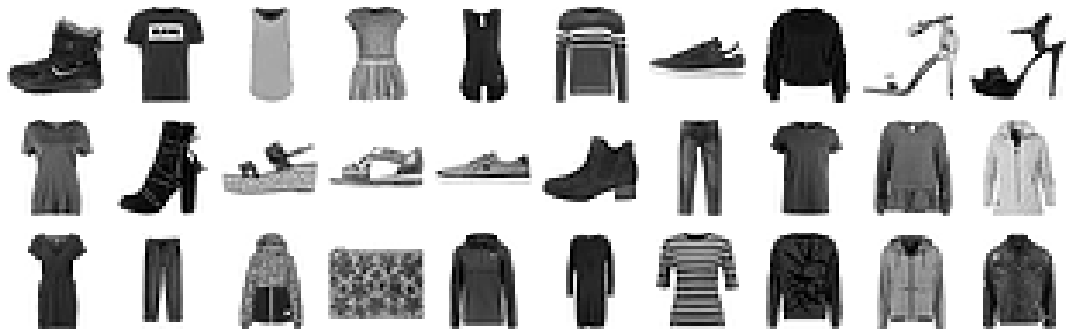

In [33]:
#sample images
plt.figure(figsize=(15,8))
for i in range(30):
    plt.subplot(5,10,i+1)
    plt.imshow(X_train[i].reshape((28,28)),cmap='binary')
    plt.axis("off")
plt.tight_layout()
plt.show()

In [34]:
#We assign the classes to the target variables
#and they are given below
class_names = ["T-shirt/top" , "Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [36]:
#Lets verify if our class mapping is correct
class_names[y_train[6]]

'Sneaker'

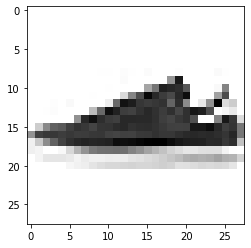

In [37]:
plt.imshow(X_train[6].reshape((28,28)),cmap='binary')

In [52]:
X_valid,X_train = X_train[:5000] / 255.0 , X_train[5000:] / 255.0
y_valid,y_train = y_train[:5000] , y_train[5000:]

In [39]:
import keras 
from keras.models import Sequential
from keras.layers import Dense,Activation

ann= Sequential()
ann.add(Dense(10, activation= 'relu', input_dim= 784))
ann.add(Dense(30, activation= 'relu'))
ann.add(Dense(10, activation='softmax'))
ann.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 10)                7850      
                                                                 
 dense_6 (Dense)             (None, 30)                330       
                                                                 
 dense_7 (Dense)             (None, 10)                310       
                                                                 
Total params: 8,490
Trainable params: 8,490
Non-trainable params: 0
_________________________________________________________________


In [44]:
#Lets build a model with 2 Hidden Layers
model=keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300,activation="relu"))
model.add(keras.layers.Dense(100,activation="relu"))
model.add(keras.layers.Dense(10,activation="softmax"))

In [47]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_8 (Dense)             (None, 300)               235500    
                                                                 
 dense_9 (Dense)             (None, 100)               30100     
                                                                 
 dense_10 (Dense)            (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [48]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="sgd",metrics=["accuracy"])

In [53]:
history = model.fit(X_train,y_train,epochs=10,validation_data=(X_valid,y_valid))

Epoch 1/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.7328 - accuracy: 0.7603 - val_loss: 0.5018 - val_accuracy: 0.8306
Epoch 2/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4872 - accuracy: 0.8319 - val_loss: 0.4458 - val_accuracy: 0.8522
Epoch 3/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4405 - accuracy: 0.8470 - val_loss: 0.4130 - val_accuracy: 0.8600
Epoch 4/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4124 - accuracy: 0.8559 - val_loss: 0.3979 - val_accuracy: 0.8626
Epoch 5/10
1719/1719 [==============================] - 11s 6ms/step - loss: 0.3930 - accuracy: 0.8624 - val_loss: 0.3927 - val_accuracy: 0.8644
Epoch 6/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3773 - accuracy: 0.8667 - val_loss: 0.3841 - val_accuracy: 0.8678
Epoch 7/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3632 - accuracy: 0.8732 - val_loss: 0.3577 - val_accuracy

In [54]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 2s 5ms/step - loss: 63.4391 - accuracy: 0.8378


[63.4390983581543, 0.8378000259399414]

In [55]:
import pandas as pd
trainpreds= np.argmax(model.predict(X_train), axis=1)
testpreds= np.argmax(model.predict(X_test), axis=1)

313/313 [==============================] - 1s 3ms/step


In [56]:
print(trainpreds.shape)
print(testpreds.shape)

(55000,)
(10000,)


In [59]:
from keras.layers import Conv2D,MaxPool2D,Flatten

cnn1= Sequential()
cnn1.add(Conv2D(filters=8, kernel_size=(2,2),strides=1,
                padding='same',activation='relu',
                input_shape=(28,28,1)))
cnn1.add(MaxPool2D(padding='same'))

cnn1.add(Flatten())
cnn1.add(Dense(100,activation='relu'))
cnn1.add(Dense(10,activation='softmax'))
cnn1.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 8)         40        
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 8)        0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 1568)              0         
                                                                 
 dense_14 (Dense)            (None, 100)               156900    
                                                                 
 dense_15 (Dense)            (None, 10)                1010      
                                                                 
Total params: 157,950
Trainable params: 157,950
Non-trainable params: 0
________________________________________________

In [60]:
print("train accuracy",np.sum(y_train==trainpreds)/len(y_train))
print("test accuracy",np.sum(y_test==testpreds)/len(y_test))

train accuracy 0.8769636363636364
test accuracy 0.8378
